# Jobsheet 02 - Regression

Isikan identitas berikut <br>
**Nama  : Mochammad Hairullah** <br>
**NIM   : 2041720074** <br>
**Kelas : TI-3H**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
path = './dataset-chilipp.csv'
data = pd.read_csv(path)
data = pd.DataFrame(data)
data.head()

,id,user_id,tanggal,permintaan,ketersediaan,harga,berita,created_at,updated_at
0,1,2,8/1/2021,5082,2621,26500,Naik,2022-07-13,2022-07-13
1,2,2,8/2/2021,1804,8280,27150,Turun,2022-07-13,2022-07-13
2,3,2,8/3/2021,8464,4266,27150,Turun,2022-07-13,2022-07-13
3,4,2,8/4/2021,5827,5112,27650,Tetap,2022-07-13,2022-07-13
4,5,2,8/5/2021,5870,5499,26400,Naik,2022-07-13,2022-07-13


In [ ]:
# data['berita'] = data['berita'].astype(str).astype(float)
data.dtypes

# data['berita'] = pd.factorize(data['berita'])[0] + 1

id               int64
user_id          int64
tanggal         object
permintaan       int64
ketersediaan     int64
harga            int64
berita          object
created_at      object
updated_at      object
dtype: object

In [ ]:
# pemahaman terhadap data
# ukuran data

# print(data)

data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            273 non-null    int64 
 1   user_id       273 non-null    int64 
 2   tanggal       273 non-null    object
 3   permintaan    273 non-null    int64 
 4   ketersediaan  273 non-null    int64 
 5   harga         273 non-null    int64 
 6   berita        273 non-null    object
 7   created_at    273 non-null    object
 8   updated_at    273 non-null    object
dtypes: int64(5), object(4)
memory usage: 19.3+ KB


,id,user_id,permintaan,ketersediaan,harga
count,273.000000,273.0,273.000000,273.000000,273.000000
mean,137.000000,2.0,5434.553114,4829.952381,32477.655678
std,78.952517,0.0,2489.636856,2406.670899,13197.821609
min,1.000000,2.0,1043.000000,1011.000000,17000.000000
25%,69.000000,2.0,3197.000000,2919.000000,21100.000000
50%,137.000000,2.0,5458.000000,4555.000000,29300.000000
75%,205.000000,2.0,7595.000000,6721.000000,40150.000000
max,273.000000,2.0,9975.000000,9934.000000,70900.000000


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['tanggal'] = LabelEncoder().fit_transform(data['tanggal'])
data['berita'] = LabelEncoder().fit_transform(data['berita'])
# data.head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


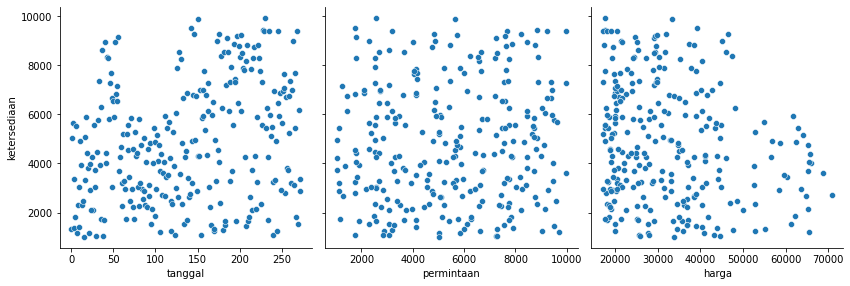

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['tanggal', 'permintaan', 'harga'], 
             y_vars='ketersediaan', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

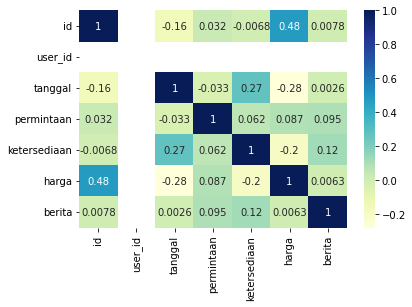

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa ketersediaan memiliki korelasi yang rendah terhadap Permintatan

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['permintaan']
y = data['ketersediaan']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

65     3678
98     4066
104    5212
48     7070
159    3724
       ... 
226    5935
66     4259
53     6746
79     4438
8      3336
Name: ketersediaan, Length: 191, dtype: int64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const         4524.581048
permintaan       0.056531
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ketersediaan   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7093
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.401
Time:                        11:57:41   Log-Likelihood:                -1751.3
No. Observations:                 191   AIC:                             3507.
Df Residuals:                     189   BIC:                             3513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4524.5810    413.592     10.940      0.000    3708.732    5340.430
permintaan     0.0565      0.067      0.842      0.401      -0.076       0.189
==============================================================================
Omnibus:                       21.270   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.574
Skew:                           0.194   Prob(JB):                       0.0227
Kurtosis:                       2.105   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

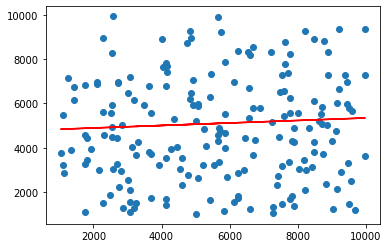

In [ ]:
# visualisasi garis regresi
# print(X.size, y.size)
plt.scatter(X_train, y_train)
plt.plot(X_train, 4777.255998 + 0.056531*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


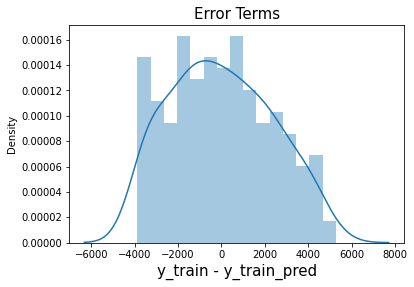

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

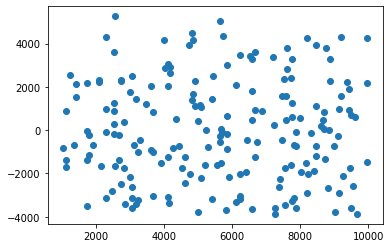

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


59     4897.685842
139    4887.962505
220    4677.214827
134    4748.387394
190    4931.943646
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.00374611607992803

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.004 sedangkan dari data testing adalah 0,003. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

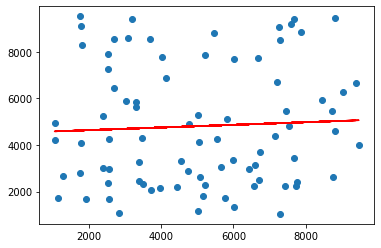

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Regresi Ganda

In [ ]:
data

,id,user_id,tanggal,permintaan,ketersediaan,harga,berita,created_at,updated_at
0,1,2,212,5082,2621,26500,0,2022-07-13,2022-07-13
1,2,2,223,1804,8280,27150,2,2022-07-13,2022-07-13
2,3,2,234,8464,4266,27150,2,2022-07-13,2022-07-13
3,4,2,237,5827,5112,27650,1,2022-07-13,2022-07-13
4,5,2,238,5870,5499,26400,0,2022-07-13,2022-07-13
...,...,...,...,...,...,...,...,...,...
268,269,2,200,6529,8318,30250,0,2022-07-13,2022-07-13
269,270,2,201,3201,6134,31500,2,2022-07-13,2022-07-13
270,271,2,202,5730,9220,29750,0,2022-07-13,2022-07-13
271,272,2,203,7280,8500,29200,2,2022-07-13,2022-07-13


In [ ]:
xbaru = data[['permintaan', 'harga']]
ybaru = data['ketersediaan']

In [ ]:
xConst = sm.add_constant(xbaru)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(ybaru, xConst).fit()
predictions = model.predict(xConst)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ketersediaan   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.710
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00143
Time:                        11:58:13   Log-Likelihood:                -2505.8
No. Observations:                 273   AIC:                             5018.
Df Residuals:                     270   BIC:                             5028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5649.7162    473.148     11.941      0.0

In [ ]:
X_trainx, X_testx, y_trainy, y_testy = train_test_split(xbaru, ybaru, 
                                                    test_size = 0.3, random_state = 100)

In [ ]:
X_trainx
y_trainy

65     3678
98     4066
104    5212
48     7070
159    3724
       ... 
226    5935
66     4259
53     6746
79     4438
8      3336
Name: ketersediaan, Length: 191, dtype: int64

In [ ]:
lr = sm.OLS(ybaru, xConst).fit()
lr.params

const         5649.716217
permintaan       0.077408
harga           -0.038194
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ketersediaan   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.710
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00143
Time:                        11:58:27   Log-Likelihood:                -2505.8
No. Observations:                 273   AIC:                             5018.
Df Residuals:                     270   BIC:                             5028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5649.7162    473.148     11.941      0.000    4718.188    6581.245
permintaan     0.0774      0.058      1.343      0.180      -0.036       0.191
harga         -0.0382      0.011     -3.513      0.001      -0.060      -0.017
==============================================================================
Omnibus:                       37.649   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.036
Skew:                           0.223   Prob(JB):                      0.00243
Kurtosis:                       2.073   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

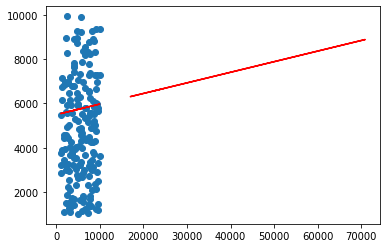

In [ ]:
plt.scatter(X_train, y_trainy)
plt.plot(X_trainx, 5491.773924 + (0.082721 + (-0.034897))*X_trainx, 'r')
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


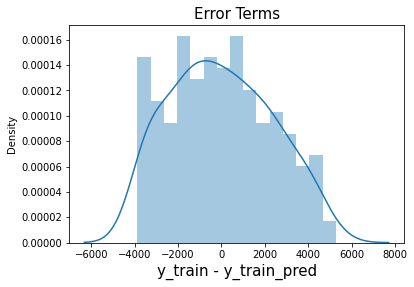

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

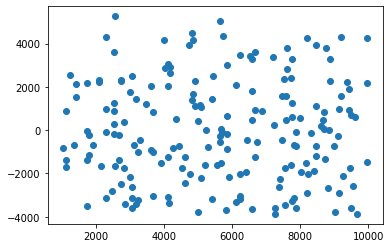

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


59     5304.895317
139    3800.564180
220    4109.857475
134    3542.235490
190    4910.087166
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.053688989797562536

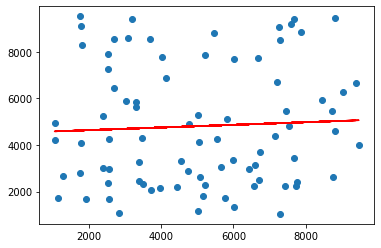

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()